SUjet:PREDICTION DE SENTIMENT A PARTIR D'UN TEXTE

In [ ]:
%%capture
!pip install datasets

In [ ]:
import datasets as ds

In [ ]:
from datasets import load_dataset

In [ ]:
import pandas as pd

In [ ]:
train_data =load_dataset('allocine',split='train')
validation_data =load_dataset('allocine',split='validation')
test_data =load_dataset('allocine',split='test')



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/160000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/20000 [00:00<?, ? examples/s]

In [ ]:
train_data

Dataset({
    features: ['review', 'label'],
    num_rows: 160000
})

In [ ]:
validation_data

Dataset({
    features: ['review', 'label'],
    num_rows: 20000
})

In [ ]:
test_data

Dataset({
    features: ['review', 'label'],
    num_rows: 20000
})

In [ ]:
#converting train_data to a DataFrame format
train_data =pd.DataFrame(data=train_data)
train_data.head()

,review,label
0,Si vous cherchez du cinéma abrutissant à tous ...,0
1,"Trash, re-trash et re-re-trash...! Une horreur...",0
2,"Et si, dans les 5 premières minutes du film, l...",0
3,Mon dieu ! Quelle métaphore filée ! Je suis ab...,0
4,"Premier film de la saga Kozure Okami, ""Le Sabr...",1


In [ ]:
#converting validation_data to a DataFrame format
validation_data =pd.DataFrame(data=validation_data)
validation_data.head()

,review,label
0,Ce film est tout ce qu'il y a de plus sympa. M...,0
1,"The Wall a été réalisé par Alan Parker (Fame, ...",1
2,"Encore un film majeur tres mal distribué, comm...",1
3,L'idée est très bonne mais le film manque de r...,0
4,Un petit nanar rigolo a regarder. A voir une f...,0


In [ ]:
#converting test_data to a DataFrame format
test_data =pd.DataFrame(data=test_data)
test_data.head()

,review,label
0,"Magnifique épopée, une belle histoire, touchan...",1
1,Je n'ai pas aimé mais pourtant je lui mets 2 é...,0
2,Un dessin animé qui brille par sa féerie et se...,1
3,"Si c'est là le renouveau du cinéma français, c...",0
4,Et pourtant on s’en Doutait !Second volet très...,0


In [ ]:
print(train_data.isnull().sum())

review    0
label     0
dtype: int64


In [ ]:
print(validation_data.isnull().sum())


review    0
label     0
dtype: int64


In [ ]:
print(test_data.isnull().sum())

review    0
label     0
dtype: int64


In [ ]:
%%capture
!pip install spacy

In [ ]:
%%capture
!python -m spacy download fr_core_news_md
# Available trained pipelines for French: https://spacy.io/models/fr

In [ ]:
#defining a textpreprocessing pipeline
import spacy

nlp = spacy.load('fr_core_news_md')
# Le pipeline par défaut
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
import pandas as pd
import spacy
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline





# Définir le préprocesseur spaCy
class SpacyPreprocessor(TransformerMixin):
    def __init__(self, language='fr_core_news_md', disable=['parser', 'ner']):
        self.nlp = spacy.load(language, disable=disable)

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        preprocessed_texts = []
        for text in X:
            doc = self.nlp(text)
            preprocessed_text = " ".join([token.text for token in doc if (not token.is_punct) and (not token.is_space) and (not token.like_url) and (not token.is_stop)])
            preprocessed_texts.append(preprocessed_text)
        return preprocessed_texts



# Créer un pipeline de prétraitement
preprocessing_pipeline = Pipeline([
    ('preprocessor', SpacyPreprocessor()),
    # Vous pouvez ajouter d'autres étapes de prétraitement ou passer directement à la modélisation
])



In [ ]:
# Apply pipeline preprocessing on train data
X_train_preprocessed = preprocessing_pipeline.fit_transform(train_data['review'][:5000])


In [ ]:
#Apply pipeline preprocessing on validation data
X_validation_preprocessed = preprocessing_pipeline.transform(validation_data['review'][:1000])

In [ ]:
#Apply pipeline preprocessing on validation data
X_test_preprocessed = preprocessing_pipeline.transform(test_data['review'][:1000])

In [ ]:
train_preprocessed=pd.DataFrame(data=X_train_preprocessed)
train_preprocessed.head()

,0
0,cherchez cinéma abrutissant étages aucune peur...
1,Trash re-trash re-re-trash horreur nom Imagine...
2,5 premières minutes film pathétique maquette t...
3,dieu métaphore filée abasourdi réellement ici ...
4,film saga Kozure Okami Sabre vengeance bon fil...


In [ ]:
validation_preprocessed=pd.DataFrame(data=X_validation_preprocessed)
validation_preprocessed.head()


,0
0,film sympa ensemble dépourvu clichés hypocrite...
1,The Wall été réalisé Alan Parker Fame Midnight...
2,film majeur mal distribué hasard voulait empec...
3,idée bonne film manque rythme courte durée par...
4,petit nanar rigolo regarder voir fois rigoler ...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#writting function for tokenizing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize


def tokenize(d):
    return " ".join([w for w in word_tokenize(d) if w.isalpha()])









toknezing

In [ ]:
#Tokenizing the differents reviews
train_preprocessed[0] = train_preprocessed[0].apply(tokenize)
validation_preprocessed[0] = validation_preprocessed[0].apply(tokenize)

Countvectorizer

In [ ]:

#countvectorizing (bag of word)
count_vec = CountVectorizer(max_features=1000)
train_vec = count_vec.fit_transform(train_preprocessed[0])
validation_vec = count_vec.transform(validation_preprocessed[0])

#scaling data
scaler = MaxAbsScaler()
train_vec_scaled = scaler.fit_transform(train_vec)
validation_vec_scaled = scaler.transform(validation_vec)

Countvectorizer + logistic regression

In [ ]:


clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(train_vec_scaled, train_data['label'][:5000])
validation_pred = clf.predict(validation_vec_scaled)

print(classification_report(validation_data['label'][:1000], validation_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       528
           1       0.85      0.86      0.86       472

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.87      0.86      0.87      1000



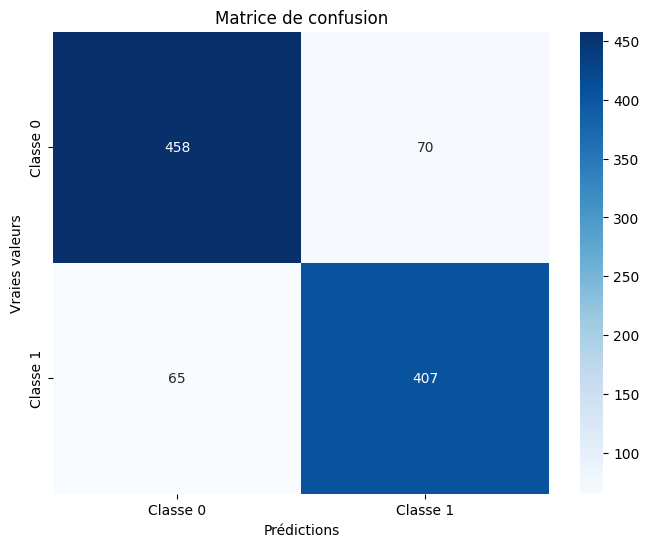

In [ ]:
#showing confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the confusion matrix
conf_matrix = confusion_matrix(validation_data['label'][:1000], validation_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Classe " + str(i) for i in range(conf_matrix.shape[1])],
            yticklabels=["Classe " + str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

counvectorizer + randomforestclassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=42)
rfc.fit(train_vec_scaled, train_data['label'][:5000])
validation_pred = rfc.predict(validation_vec_scaled)

print(classification_report(validation_data['label'][:1000], validation_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       528
           1       0.72      0.79      0.75       472

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



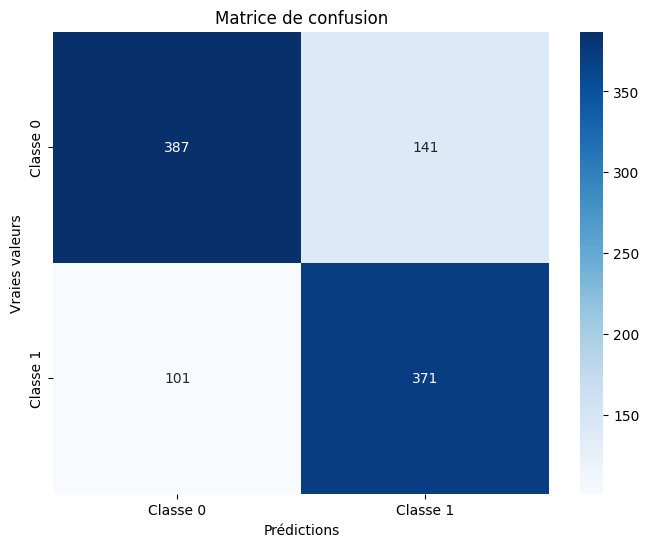

In [ ]:
#showing confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the confusion matrix
conf_matrix = confusion_matrix(validation_data['label'][:1000], validation_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Classe " + str(i) for i in range(conf_matrix.shape[1])],
            yticklabels=["Classe " + str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

TF-IDF+ logistic regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_features=1000)

train_vec_tf = tfidf_vec.fit_transform(train_preprocessed[0])
validation_vec_tf = tfidf_vec.transform(validation_preprocessed[0])

scaler = MaxAbsScaler()
train_vec_tf_scaled = scaler.fit_transform(train_vec_tf)
validation_vec_tf_scaled = scaler.transform(validation_vec_tf)

In [ ]:
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(train_vec_tf_scaled, train_data['label'][:5000])
validation_pred = clf.predict(validation_vec_tf_scaled)

print(classification_report(validation_data['label'][:1000], validation_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       528
           1       0.88      0.87      0.87       472

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



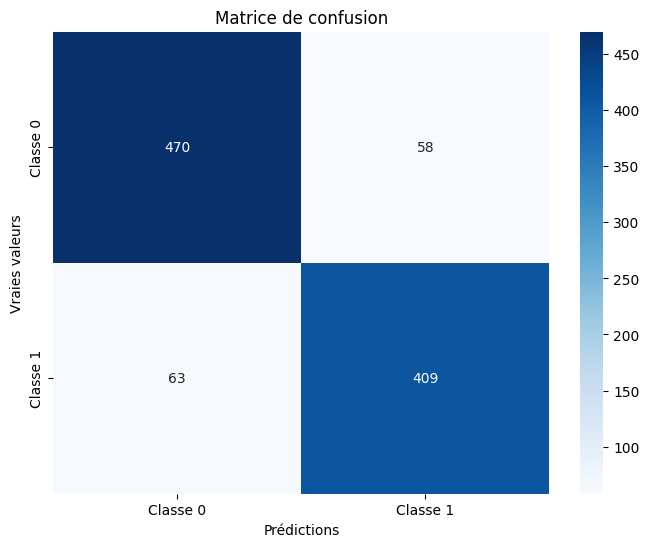

In [ ]:
#showing confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the confusion matrix
conf_matrix = confusion_matrix(validation_data['label'][:1000], validation_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Classe " + str(i) for i in range(conf_matrix.shape[1])],
            yticklabels=["Classe " + str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

TF-IDF + RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=2, random_state=42)
rfc.fit(train_vec_tf_scaled, train_data['label'][:5000])
validation_pred = rfc.predict(validation_vec_tf_scaled)

print(classification_report(validation_data['label'][:1000], validation_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       528
           1       0.71      0.79      0.75       472

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



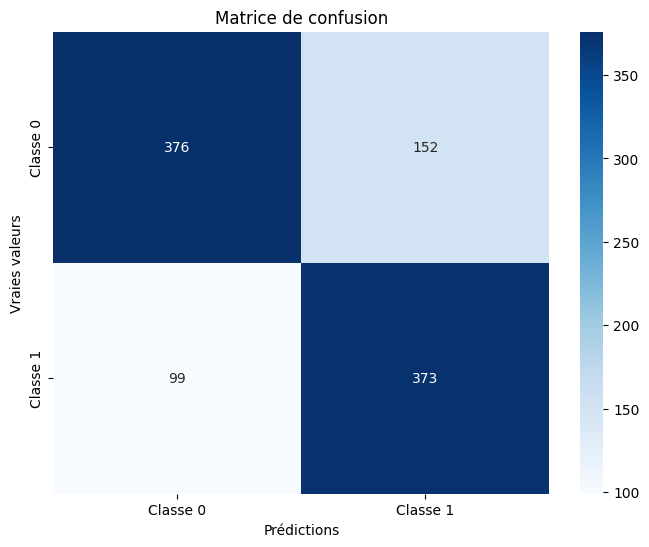

In [ ]:
#showing confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the confusion matrix
conf_matrix = confusion_matrix(validation_data['label'][:1000], validation_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Classe " + str(i) for i in range(conf_matrix.shape[1])],
            yticklabels=["Classe " + str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

Encoding text with pretrained word2vec model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading model
import gensim
from gensim.models import Word2Vec, KeyedVectors

path_word2vec_french = '/content/drive/MyDrive/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin'
model_fr = KeyedVectors.load_word2vec_format(path_word2vec_french, binary=True, unicode_errors="ignore")


In [ ]:
#function for encoding texts
import numpy as np
from gensim.models import KeyedVectors

def encode_text_with_word2vec(df, text_column, word2vec_model):
    """
    Encode les textes d'un DataFrame à l'aide d'un modèle Word2Vec pré-entraîné.

    Args:
    - df : DataFrame : Le DataFrame contenant la colonne de texte à encoder.
    - text_column : str : Le nom de la colonne contenant les textes à encoder.
    - model_path : str : Le chemin vers le modèle Word2Vec pré-entraîné.

    Returns:
    - encoded_texts : np.ndarray : Un tableau numpy contenant les représentations vectorielles des textes.
    """

    # Charger le modèle Word2Vec pré-entraîné
    #word2vec_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

    encoded_texts = []

    # Parcourir chaque texte dans la colonne spécifiée
    for text in df[text_column]:
        # Tokeniser le texte et filtrer les mots inconnus
        tokens = [word for word in text.split() if word in word2vec_model.index_to_key]

        if tokens:
            # Calculer la moyenne des vecteurs de mots pour représenter le texte
            text_vector = np.mean(word2vec_model[tokens], axis=0)
        else:
            # Si aucun mot connu n'est trouvé, utiliser un vecteur nul
            text_vector = np.zeros(word2vec_model.vector_size)

        encoded_texts.append(text_vector)

    return np.array(encoded_texts)

In [ ]:
#encoding training texts
train_encoded_texts = encode_text_with_word2vec(train_preprocessed,0,model_fr)

#putting encoding text into a dataframe
train_encoding_df =pd.DataFrame(data=train_encoded_texts)
train_encoding_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.131018,0.130948,-0.206061,-0.106107,-0.032510,0.001666,-0.083208,-0.200108,0.069226,0.066609,...,0.145711,-0.019650,0.023122,-0.153087,0.100149,0.000880,-0.052629,0.016649,0.032655,0.045898
1,0.246859,0.280524,-0.091108,-0.031521,-0.157678,0.103214,0.028656,-0.118514,0.117630,0.067797,...,0.053961,0.054797,-0.052361,-0.133282,-0.029034,-0.060473,-0.080828,-0.211310,0.108691,0.266783
2,0.129226,0.413348,-0.054674,0.083659,-0.010911,0.068616,0.007068,0.094211,-0.276342,0.072734,...,-0.053193,-0.184033,-0.001343,-0.226727,0.129009,-0.101274,0.114453,-0.242268,-0.006519,0.007229
3,0.133945,0.126129,-0.019638,-0.094150,-0.022445,-0.007681,-0.031340,-0.062308,0.168222,-0.006255,...,0.146917,-0.161192,-0.087624,-0.124595,0.250326,0.096166,-0.036031,-0.138057,-0.113392,0.040271
4,0.390728,0.443091,0.347708,-0.087798,-0.622570,0.193978,0.167553,0.078476,-0.116929,0.293516,...,0.178755,0.167913,0.022148,0.148263,0.311010,0.554270,0.021528,-0.254242,-0.039954,0.036987


In [ ]:
#encoding validation texts
validation_encoded_texts = encode_text_with_word2vec(validation_preprocessed,0,model_fr)

#putting encoding text into a dataframe
validation_encoding_df =pd.DataFrame(data=validation_encoded_texts)
validation_encoding_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.461608,0.189843,0.134696,-0.297266,-0.007979,0.066716,-0.075973,-0.313043,-0.164898,0.140450,...,0.224954,0.157968,0.046105,0.058852,0.042107,0.137898,0.015172,-0.167457,0.024650,-0.030659
1,0.266655,0.354430,-0.090686,-0.149461,-0.384740,0.219429,0.068373,-0.119707,-0.149671,-0.152049,...,0.088304,-0.113039,-0.015573,0.027114,-0.005386,0.099610,0.098404,-0.261297,0.057807,0.047834
2,-0.038768,0.118322,0.058062,0.058113,-0.363843,-0.053009,-0.054226,-0.138656,-0.222806,-0.038963,...,0.193864,-0.171638,0.075303,-0.365138,0.103374,-0.032395,0.041989,-0.020750,-0.196750,-0.043382
3,0.451727,0.320828,-0.221112,0.088199,0.135030,0.232750,0.070932,0.203975,-0.118561,0.092539,...,0.124692,-0.274122,0.359239,-0.015029,0.066973,-0.156080,-0.238637,0.094513,-0.312650,0.191356
4,0.354287,0.057382,-0.133067,-0.154101,0.366360,-0.112742,0.047536,-0.047297,-0.042384,0.025343,...,0.427718,-0.060452,0.203949,-0.321638,-0.003484,0.008411,-0.155225,0.082018,-0.032775,-0.009731


Using LSTM for the classification

In [ ]:
# Obtaining vacabulary size
vocab_size = len(model_fr.index_to_key)
print(vocab_size)
embedding_dim = model_fr.vector_size
print(embedding_dim)


155562
200


In [ ]:
# Neural Network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, GlobalMaxPooling1D, Conv1D, Flatten, Bidirectional

lstm_adam_model = Sequential()
lstm_adam_model.add(Embedding(input_dim =vocab_size,output_dim=embedding_dim,input_length=200))
lstm_adam_model.add(LSTM(units=128, return_sequences= False))
lstm_adam_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

lstm_adam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(lstm_adam_model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 200, 200)          31112400  
                                                                 
 lstm_10 (LSTM)              (None, 128)               168448    
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 31280977 (119.33 MB)
Trainable params: 31280977 (119.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
#Model training
lstm_adam_model_history = lstm_adam_model.fit(
    train_encoding_df,
    train_data['label'][:5000],
    epochs=5,
    batch_size=128,
    validation_data=(validation_encoding_df,validation_data['label'][:1000])
)


Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sequential_11/embedding_10/embedding_lookup defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-112-5edac30e9839>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py", line 272, in call

indices[96,168] = -1 is not in [0, 155562)
	 [[{{node sequential_11/embedding_10/embedding_lookup}}]] [Op:__inference_train_function_30375]